In [1]:
import pynq
from pynq import GPIO

__author__ = "Adam Taylor"
__copyright__ = "Copyright 2020, Adiuvo"
__email__ = "Adam@adiuvoengineering.com"


class xadc_scopeOverlay(pynq.Overlay):
    """.
    """
    def __init__(self, bitfile, **kwargs):
        super().__init__(bitfile, **kwargs)
        if self.is_loaded():
            pass

In [2]:
from pynq import pl
from pynq import overlay
ol = xadc_scopeOverlay('design_1.bit')



In [3]:
ol?

[8159 8158 8180 8171 8169 8193 8138 8155 8179 8185 8166 8180 8119 8165
 8156 8172 8149 8175 8177 8168 8186 8189 8165 8165 8191 8166 8167 8173
 8205 8171 8176 8173 8199 8180 8175 8167 8194 8182 8165 8137 8185 8154
 8179 8179 8159 8165 8171 8165 8163 8172 8181 8157 8185 8165 8183 8157
 8181 8173 8163 8167 8156 8170 8139 8151 8197 8184 8150 8175 8154 8157
 8145 8167 8153 8183 8167 8160 8186 8157 8173 8169 8173 8181 8177 8154
 8181 8179 8151 8171 8150 8196 8159 8160 8196 8153 8197 8176 8175 8177
 8188 8186 8184 8189 8194 8167 8160 8171 8185 8163 8159 8179 8187 8185
 8186 8145 8171 8172 8156 8172 8139 8157 8174 8155 8168 8171 8179 8189
 8185 8177]
[8135 8156 8168 8167 8167 8195 8151 8181 8165 8159 8154 8180 8171 8167
 8160 8161 8169 8160 8210 8187 8169 8159 8163 8162 8184 8149 8173 8161
 8119 8161 8187 8184 8147 8165 8184 8159 8187 8169 8178 8179 8178 8172
 8163 8156 8143 8176 8184 8174 8197 8191 8175 8169 8167 8157 8159 8157
 8141 8169 8193 8162 8179 8187 8171 8158 8161 8151 8160 8171 8171

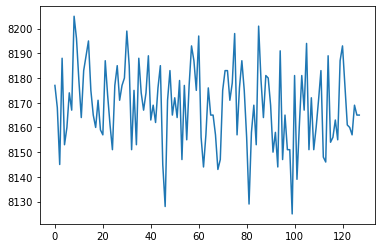

In [6]:
from pynq import pl
from pynq import overlay
# from pynq.overlays.xadc_scope import xadc_scopeOverlay
overlay = xadc_scopeOverlay('design_1.bit')

import numpy as np
from pynq import allocate
from pynq import Overlay
import matplotlib.pyplot as mp

input_buffer = allocate(shape=(128,), dtype=np.uint16)

dma = overlay.axi_dma_0
recvstatus = dma.recvchannel.running

dma.buffer_max_size
samples = 0
maxSamples = 5
xAdcVoltages = np.copy(input_buffer)


while samples < maxSamples:
    dma.recvchannel.transfer(input_buffer)
    dma.recvchannel.wait()
    print(input_buffer)   
    np.append(xAdcVoltages,input_buffer)
    samples += 1

mp.plot(input_buffer)
mp.show()
#     mp.clf()
